In [1]:
import nltk

In [ ]:
#nltk.download_shell()

In [2]:
reviews = [line.rstrip() for line in open('movie_review.csv')]

In [3]:
print(len(reviews))

64721


In [4]:
reviews[3]

'0,cv000,29590,2,to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .,pos'

In [5]:
for review_no,review in enumerate(reviews[:10]):
    print(review_no,review)
    print('/n')

0 fold_id,cv_tag,html_id,sent_id,text,tag
/n
1 0,cv000,29590,0,"films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .",pos
/n
2 0,cv000,29590,1,"for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen .",pos
/n
3 0,cv000,29590,2,to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .,pos
/n
4 0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .",pos
/n
5 0,cv000,29590,4,"in other words , don't dismiss this film because of its source .",pos
/n
6 0,cv000,29590,5,"if you 

In [6]:
 import pandas as pd

In [7]:
reviews = pd.read_csv("movie_review.csv")

In [8]:
reviews.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [9]:
reviewss = reviews.drop(['fold_id','cv_tag','html_id','sent_id'],axis = 1)

In [10]:
reviewss.head()

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos


In [11]:
reviewss.describe()

,text,tag
count,64720,64720
unique,63652,2
top,.,pos
freq,123,32937


In [12]:
reviewss['tag'].value_counts()

pos    32937
neg    31783
Name: tag, dtype: int64

In [13]:
reviewss.groupby('tag').describe()

text                
     count unique top freq
tag                       
neg  31783  31175   .   78
pos  32937  32584   .   45

In [14]:
reviewss['length'] = reviewss['text'].apply(len)

In [15]:
reviewss.head()

,text,tag,length
0,films adapted from comic books have had plenty...,pos,265
1,"for starters , it was created by alan moore ( ...",pos,172
2,to say moore and campbell thoroughly researche...,pos,150
3,"the book ( or "" graphic novel , "" if you will ...",pos,138
4,"in other words , don't dismiss this film becau...",pos,64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

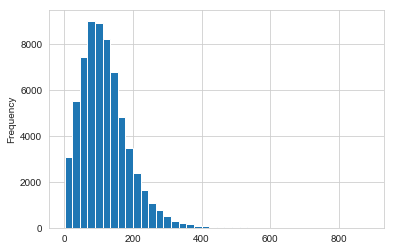

In [17]:
sns.set_style('whitegrid')
reviewss['length'].plot.hist(bins = 40)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002056E764CC0>,
      dtype=object)

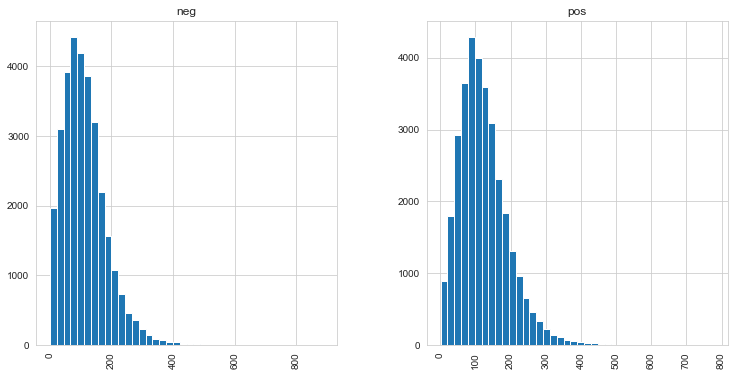

In [18]:
reviewss.hist(column = 'length', by='tag',bins = 40, figsize = (12,6))

In [19]:
import string

In [20]:
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
from nltk.corpus import stopwords

In [22]:
reviewss['text'].head()

0    films adapted from comic books have had plenty...
1    for starters , it was created by alan moore ( ...
2    to say moore and campbell thoroughly researche...
3    the book ( or " graphic novel , " if you will ...
4    in other words , don't dismiss this film becau...
Name: text, dtype: object

In [23]:
 m = 'I am not going ,to wake you up!'

In [24]:
mo =[c for c in m if c not in string.punctuation]

In [25]:
stopwords.words('english') 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
mo = ''.join(mo)

In [34]:
mo.split()

['I', 'am', 'not', 'going', 'to', 'wake', 'you', 'up']

In [35]:
clean = [word for word in mo.split() if word.lower() not in stopwords.words('english')]

In [36]:
clean

['going', 'wake']

In [37]:
def text_process(m):
    mo = [char for char in m if char not in string.punctuation]
    mo = ''.join(mo)
    return [word for word in mo.split() if word.lower() not in stopwords.words('english')]

In [38]:
reviewss.head()

,text,tag,length
0,films adapted from comic books have had plenty...,pos,265
1,"for starters , it was created by alan moore ( ...",pos,172
2,to say moore and campbell thoroughly researche...,pos,150
3,"the book ( or "" graphic novel , "" if you will ...",pos,138
4,"in other words , don't dismiss this film becau...",pos,64


In [39]:
reviewss['text'].head(5).apply(text_process)

0    [films, adapted, comic, books, plenty, success...
1    [starters, created, alan, moore, eddie, campbe...
2    [say, moore, campbell, thoroughly, researched,...
3    [book, graphic, novel, 500, pages, long, inclu...
4                 [words, dont, dismiss, film, source]
Name: text, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
transformer = CountVectorizer(analyzer=text_process).fit(reviewss['text'])

In [44]:
print(len(transformer.vocabulary_))

47425


In [45]:
me = reviewss['text'][3]

In [46]:
print(me)

the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .


In [47]:
t = transformer.transform([me])

In [48]:
print(t)

  (0, 442)	1
  (0, 528)	1
  (0, 5061)	1
  (0, 8817)	1
  (0, 16048)	1
  (0, 17869)	1
  (0, 20947)	1
  (0, 24600)	1
  (0, 28025)	1
  (0, 28751)	1
  (0, 28822)	1
  (0, 30207)	1


In [49]:
print(t.shape)

(1, 47425)


In [50]:
rev =  transformer.transform(reviewss['text'])

In [51]:
print('Shape of sparse matrix: ', rev.shape)

Shape of sparse matrix:  (64720, 47425)


In [52]:
rev.nnz

697071

In [53]:
#
sparsity = (100.0 *rev.nnz / (rev.shape[0]* rev.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [54]:
 from sklearn.feature_extraction.text import TfidfTransformer

In [55]:
tfidf_transformer = TfidfTransformer().fit(rev)

In [56]:
tfidf4 = tfidf_transformer.transform(t)

In [57]:
print(tfidf4)

  (0, 30207)	0.3280375515015418
  (0, 28822)	0.2408063313842554
  (0, 28751)	0.19839753580630456
  (0, 28025)	0.23357972386410203
  (0, 24600)	0.20090185135443872
  (0, 20947)	0.27096322421893076
  (0, 17869)	0.2800863139534906
  (0, 16048)	0.40275773134274573
  (0, 8817)	0.3585916639535958
  (0, 5061)	0.23215031151695817
  (0, 528)	0.34371774053579895
  (0, 442)	0.2922571060300385


In [58]:
tfidf_transformer.idf_[transformer.vocabulary_['university']]

8.581333441320815

In [60]:
rev_tfidf = tfidf_transformer.transform(rev) 

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
pos_detect = MultinomialNB().fit(rev_tfidf,reviewss['tag'])

In [63]:
pos_detect.predict(tfidf4)[0]

'pos'

In [64]:
reviewss['tag'][3]

'pos'

In [65]:
all_pred = pos_detect.predict(rev)

In [66]:
all_pred

array(['neg', 'pos', 'pos', ..., 'neg', 'neg', 'neg'], dtype='<U3')

In [67]:
from sklearn.cross_validation import train_test_split

In [68]:
rev_train,rev_test,tag_train,tag_test = train_test_split(reviewss['text'],reviewss['tag'],test_size = 0.3)

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
pipeline = Pipeline([
    ("bow",CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [73]:
pipeline.fit(rev_train,tag_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002056E56A950>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [74]:
prediction = pipeline.predict(rev_test) 

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(tag_test,prediction))

             precision    recall  f1-score   support

        neg       0.71      0.66      0.68      9522
        pos       0.69      0.74      0.71      9894

avg / total       0.70      0.70      0.70     19416

